In [2]:
import torch
import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData

nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(237)
        self.fc1 = nn.Linear(237, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(161)
        self.fc1 = nn.Linear(161, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
print(model2)


class MLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(171)
        self.fc1 = nn.Linear(171, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model3 = MLP3().cuda()
print(model3)
import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
            
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics

from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
MLP1(
  (bn0): BatchNorm1d(237, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=237, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (

In [ ]:

K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/MLP/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
68 3301


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

f1_score:  %.4f 0.9152273833646382
accuracy_score: 0.9117647058823529
recall_score: 0.9146825396825398
pre_recall: 0.9305555555555556
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:151: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


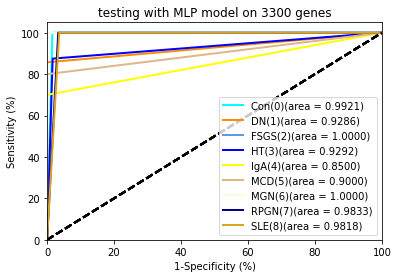

In [2]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/MLP/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoguan/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing with MLP model on 3300 genes')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [2]:
#find the means for the predicted correctly
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def bool_predict_model(test_dl, model): 
    model.eval()#测试数据稳定
    error_dataset=torch.tensor([0])
    error_dataset=error_dataset.view(1,1)
    predictions, actuals = [], [] 
    num=0
    for i, (inputs,targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        #bi_inputs=Variable(bi_inputs)
        targets = Variable(targets) 
        #print(targets)
        #print('targets:',targets.shape)        
        #targets=targets.argmax(axis=1)  
        #print('targets:',targets.shape)
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        #bi_inputs=torch.tensor(bi_inputs,dtype=torch.float)
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(),targets.cuda() 
        yhat = model(inputs) 
        
        yhat=yhat.argmax(axis=1)
        print('yhat:',yhat.shape)
        
        if targets==yhat:
            return True
        else:
            return False
#find

In [3]:
#find the samples that all samples in test dataset
import pandas as pd 
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info1.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
#mlp=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model


#testset = KZDatasetPredict(test_df)
''''
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
'''


test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info3_all_samples.csv')

138 3301
MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)


In [4]:
#compute mean value of all  samples including correctly and errorly predicted:
#and compute the samples' mean and take them as group input
import pandas as pd 
import torch
import numpy as np
test_df=pd.read_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP/test_info3_all_samples.csv',sep=',')
test_df=test_df.iloc[:,1:]
rows,cols=test_df.shape
print(rows,cols)
columns=test_df.columns[:-1].tolist()
#columns=torch.tensor(columns).cuda()#ValueError: too many dimensions 'str'


row_mean=test_df.mean(axis=0)
print(row_mean)
row_mean=row_mean[:-1]#drop off label
row_mean_np=np.array(row_mean).reshape(1,-1)
print(row_mean_np)
row_mean_df=pd.DataFrame(row_mean_np)
print(row_mean_df)
row_mean_df.columns=test_df.columns[:-1]
print(row_mean_df)
row_mean_tensor=torch.from_numpy(row_mean_np).cuda()
row_mean_tensor=torch.tensor(row_mean_tensor,dtype=torch.float)
#去掉行


#compute contribution using the Equ.
#according to the equations in paper to compute the top K genes as group features for every disease group
#compute the union of the groups' features as the evaluate model's input to evalute the classification effect to judge whether the top K genes 
#are good

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

import torch

#功能：加载保存到path中的各层参数到神经网络

path='models/MLP/MLP610.pt'

#nfm=NFM(nfm_config)
model=MLP()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
model.load_state_dict(torch.load(path),strict=False)
model.cuda()

print(model)




model_params = list(model.named_parameters())
#print(nfm_params)
net=model



weight={}
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())
    #names.append(name)
    weight[name]=parameters
#print("weight:",weight)
#q
'''
bn0.weight : torch.Size([3300])
bn0.bias : torch.Size([3300])
fc1.weight : torch.Size([2000, 3300])
fc1.bias : torch.Size([2000])
bn1.weight : torch.Size([2000])
bn1.bias : torch.Size([2000])
fc2.weight : torch.Size([100, 2000])
fc2.bias : torch.Size([100])
bn2.weight : torch.Size([100])
bn2.bias : torch.Size([100])
fc3.weight : torch.Size([9, 100])
fc3.bias : torch.Size([9])
bn3.weight : torch.Size([9])
bn3.bias : torch.Size([9])
'''






def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    n = len(labels)
    #n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output







l3=torch.mm(weight['fc3.weight'],weight['fc2.weight'])
print('l3:',l3.shape)
l2=torch.mm(l3,weight['fc1.weight'])
print('l2:',l2.shape)
contri_k=[]
contri_k_names=[]
for i in range(nfm_config['n_class']):
    l1=torch.mm(l2,row_mean_tensor.T)
    uu=l2[i,:]*row_mean_tensor.reshape(3300)
    print(uu.shape)
    top_k=torch.topk(uu,20,largest=True)################compute top 20
    print('top_k:',top_k)
    
    contri_k.append(top_k)
    top_k_indices=top_k.indices.cpu().detach().numpy().tolist()
    print('top_k_indices:',top_k_indices)
    top_k_names=[columns[j] for j in top_k_indices]
    print(top_k_names)
    contri_k_names.append(top_k_names)

contri_k_names_np=np.array(contri_k_names)
print(contri_k_names_np.shape)

contri_k_names_df=pd.DataFrame(contri_k_names_np)
contri_k_names_df.to_csv('results_genes/MLP/contri_20_names_df_all_samples.csv')
#from chartGPT of the following code
result = set()
for sublist in contri_k_names:
    result = result.union(sublist)

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(result_list)

import csv
csv_filename = "results_genes/MLP/genes_all_all_samples.csv"

# 使用CSV模块保存列表为CSV文件
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')
train_df1=train_df
print(train_df1.columns)
train_df=train_df.iloc[:,1:]
train_df1=train_df1.iloc[:,1:-1]

columns=result_list
columns.append('label')
print(columns)

#extract the new traning and test dataset for the evaluation model based on the union of the groups' features
train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/all_samples_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/all_samples_test_info.csv')





138 3301
RHOA       11.662412
STX2        7.461753
CISD1       9.605991
WDR11       8.152744
SCYL2       6.818450
             ...    
SULT1A1    10.069365
AMOT       11.380797
CA1         6.441004
GPR35       5.387948
label       4.579710
Length: 3301, dtype: float64
[[11.66241179  7.46175258  9.60599054 ... 11.38079733  6.44100363
   5.38794798]]
        0         1         2         3        4         5         6     \
0  11.662412  7.461753  9.605991  8.152744  6.81845  4.971024  9.308911   

       7         8         9     ...      3290    3291      3292      3293  \
0  5.515642  4.971946  6.482061  ...  8.145224  6.1359  7.950956  6.375078   

      3294      3295       3296       3297      3298      3299  
0  7.55439  6.601479  10.069365  11.380797  6.441004  5.387948  

[1 rows x 3300 columns]
        RHOA      STX2     CISD1     WDR11    SCYL2   MGC2889    CCDC47  \
0  11.662412  7.461753  9.605991  8.152744  6.81845  4.971024  9.308911   

       KLF8      CCL1   SLCO3A1  ..

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Index(['Unnamed: 0', 'RHOA', 'STX2', 'CISD1', 'WDR11', 'SCYL2', 'MGC2889',
       'CCDC47', 'KLF8', 'CCL1',
       ...
       'PLAC4', 'NRBP1', 'LRRC23', 'SPHK2', 'KIAA0513', 'SULT1A1', 'AMOT',
       'CA1', 'GPR35', 'label'],
      dtype='object', length=3302)
['ABCB7', 'PDE8A', 'UMOD', 'IFI6', 'VAMP8', 'OAS1', 'ZNHIT1', 'NPIPB15', 'PLIN3', 'LLGL2', 'MUC1', 'RPL37A', 'UBXN8', 'CYP2J2', 'LARP1', 'NDUFB1', 'NR0B2', 'GPX2', 'IFI30', 'DNAJB1', 'RPS27L', 'RHOB', 'NDUFA13', 'SELENOT', 'PA2G4', 'EGLN3', 'GPC5', 'FST', 'LIPC', 'ATP6V1F', 'SERPINA1', 'VDR', 'JUNB', 'PCK1', 'EPM2AIP1', 'KLF6', 'DAB2', 'DEFB1', 'AKR1C2', 'ELF3', 'PTMS', 'MRPS16', 'ACTL8', 'SLC3A2', 'ADM2', 'COX5B', 'TIPARP', 'ALOX5AP', 'PPP6R1', 'MNX1', 'NUDT4', 'ADPRM', 'ALDH3A2', 'AGL', 'METTL9', 'B4GALT5', 'VTCN1', 'ANK2', 'NONO', 'RPS24', 'GEMIN6', 'COL4A3BP', 'MT1G', 'DEPTOR', 'RGN', 'MRPS15', 'ATP5IF1', 'TRAPPC2L', 'HELZ', 'CHGB', 'TMEM100', 'FRMD8', 'TNMD', 'C1orf56', 'ACADVL', 'GLB1L', 'CFB', 'ACAD10', 'HIRA', 'ABCC3', '

549 162
549 162


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:471: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:472: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2417, device='cuda:0')
Training Epoch: 0, total loss: 64.225077
total_train_accuracy: tensor(0.5167, device='cuda:0')
Training Epoch: 1, total loss: 60.658090
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 2, total loss: 59.408775
total_train_accuracy: tensor(0.6500, device='cuda:0')
Training Epoch: 3, total loss: 58.153891
total_train_accuracy: tensor(0.7021, device='cuda:0')
Training Epoch: 4, total loss: 56.830196
total_train_accuracy: tensor(0.7208, device='cuda:0')
Training Epoch: 5, total loss: 56.164751
total_train_accuracy: tensor(0.7646, device='cuda:0')
Training Epoch: 6, total loss: 55.371037
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 7, total loss: 54.652495
total_train_accuracy: tensor(0.8000, device='cuda:0')
Training Epoch: 8, total loss: 54.194173
total_train_accuracy: tensor(0.7708, device='cuda:0')
Training Epoch: 9, total loss: 54.061429
total_train_accuracy: tensor(0.7667, device='cuda:

total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 86, total loss: 45.657568
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 87, total loss: 45.761505
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 88, total loss: 46.038259
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 89, total loss: 45.297215
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 90, total loss: 45.418726
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 91, total loss: 45.565603
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 92, total loss: 46.111832
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 93, total loss: 45.864176
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 44.707437
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 95, total loss: 44.670104
total_train_accuracy: tensor(0.9417, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 100, total loss: 44.359766
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


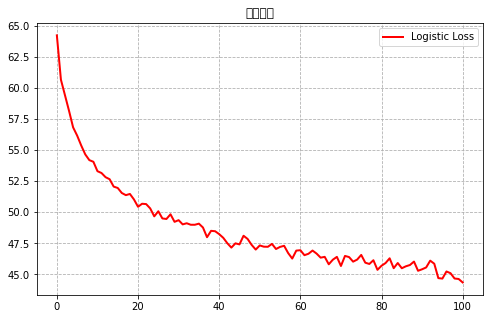

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:509: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:510: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 0, total loss: 45.837870
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 1, total loss: 45.850525
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 2, total loss: 45.370272
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 3, total loss: 45.807433
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 4, total loss: 45.560938
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 5, total loss: 45.236179
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 6, total loss: 45.354760
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 7, total loss: 44.760878
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 8, total loss: 45.314355
total_train_

total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 85, total loss: 43.923688
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 86, total loss: 43.757825
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.593302
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.886153
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 43.827015
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.578391
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 43.542269
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 43.366468
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 93, total loss: 44.077068
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 94, total loss: 43.666367
total_train_accuracy: tensor(0.9646, dev

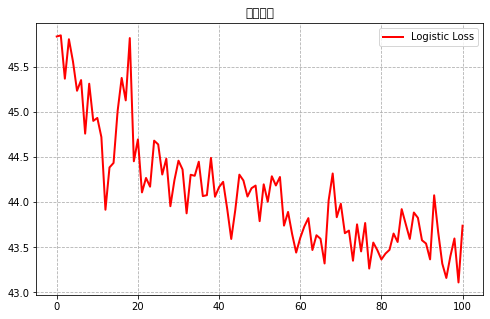

test
test
test
total_test_accuracy: tensor(0.9375, device='cuda:0')
acc_test_each_k: tensor(0.9375, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.908392
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 1, total loss: 43.883680
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 2, total loss: 43.770298
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 3, total loss: 44.103709
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 4, total loss: 43.651419
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 5, total loss: 43.768203
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 43.665146
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 43.114547
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 43.422329
total_train_

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.821167
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.963866
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.568018
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.845428
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.398490
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.506706
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.831248
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 43.118882
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 43.211156
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 43.214601
total_train_accuracy: tensor(0.9583, dev

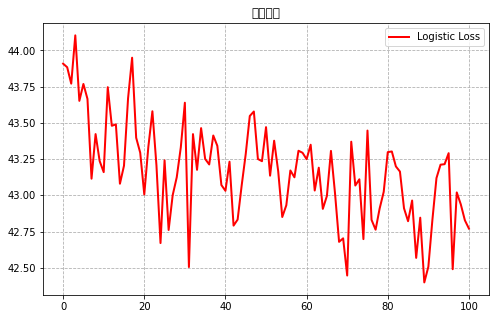

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 0, total loss: 42.949450
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.894165
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 43.009272
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.880584
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 4, total loss: 43.120012
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 43.010774
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.719514
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.869830
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.928539
total_train_

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.764224
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.922034
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.679002
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 43.043093
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.838593
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.544374
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 91, total loss: 42.163411
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 92, total loss: 43.177917
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.931486
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 94, total loss: 43.122839
total_train_accuracy: tensor(0.9833, dev

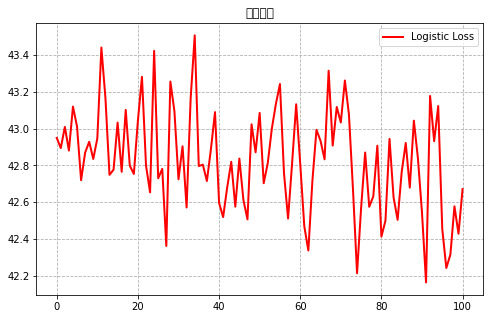

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 0, total loss: 42.937426
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.679019
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 2, total loss: 43.329829
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.584023
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 42.830506
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 43.517726
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.550252
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.534352
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 8, total loss: 42.425728
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.647990
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 86, total loss: 42.779237
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.539196
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 88, total loss: 42.205943
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.235135
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.344833
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.220141
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.433974
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.522680
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.660632
total_train_accuracy: tensor(0.9771, dev

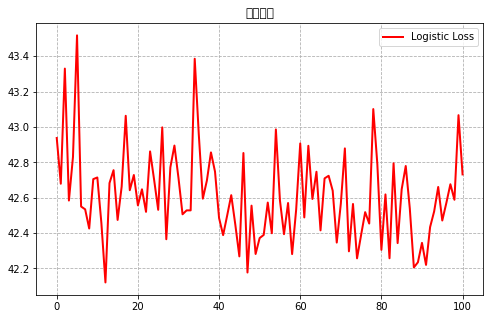

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.637430
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 1, total loss: 42.687249
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 2, total loss: 42.729972
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.615556
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.353937
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.285264
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.753056
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.725202
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 42.957532
total_train_

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.034464
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.545341
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.800724
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.672143
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.738559
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 42.713467
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.468228
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.419196
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.137695
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 94, total loss: 43.084723
total_train_accuracy: tensor(0.9750, dev

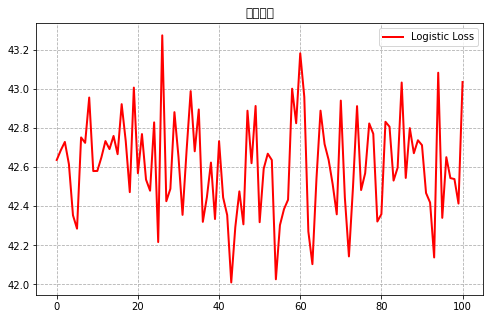

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 0, total loss: 42.319084
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.571154
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 2, total loss: 42.603411
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.638243
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 4, total loss: 42.481148
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.548889
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.499543
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.215048
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.306317
total_train_accuracy

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.489659
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.555916
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 42.503711
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.645301
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.434668
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.466513
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.503362
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 42.922219
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.710565
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 94, total loss: 41.949837
total_train_accuracy: tensor(0.9750, dev

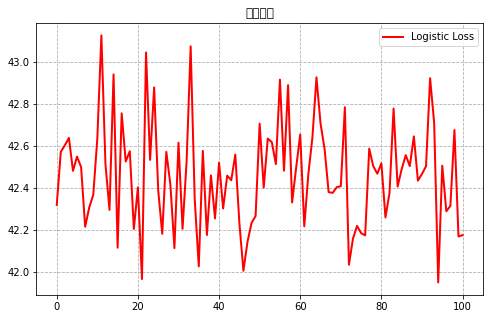

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 42.756625
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 1, total loss: 42.031603
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 2, total loss: 42.452053
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 3, total loss: 41.840125
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.285809
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.504894
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.342419
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.530591
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.358621
total_train_accuracy

total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 85, total loss: 42.243672
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.424856
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.550357
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.251448
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 89, total loss: 42.138752
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.400287
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.183336
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.692217
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.681154
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.494209
total_train_accuracy: tensor(0.9729, dev

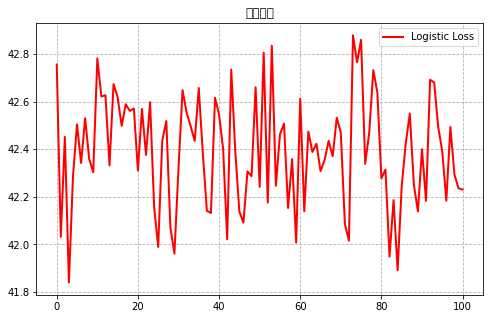

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.407120
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 1, total loss: 42.657547
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 2, total loss: 42.572873
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.429878
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.465051
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.668723
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 6, total loss: 42.688590
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 7, total loss: 41.926651
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.580951
total_train_accuracy

total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 85, total loss: 42.978774
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.177177
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.502977
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.325981
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.314035
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 90, total loss: 41.953940
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 91, total loss: 42.171663
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.296295
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.459480
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 94, total loss: 41.877668
total_train_accuracy: tensor(0.9771, dev

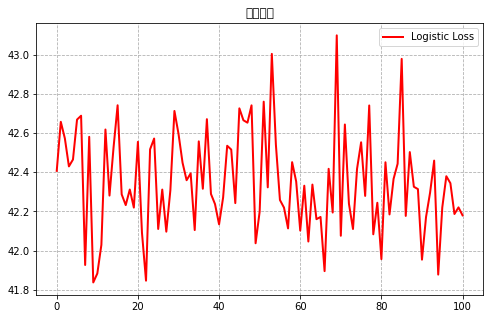

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 162
549 162
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 0, total loss: 42.504537
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.635708
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 2, total loss: 42.187446
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.427719
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.202228
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 42.526906
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.389930
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.612336
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.443965
total_train_accuracy

total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 85, total loss: 42.162752
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.319810
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 87, total loss: 42.796270
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.443374
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.255049
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.397604
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.480828
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 92, total loss: 42.145644
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.005330
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.675337
total_train_accuracy: tensor(0.9813, dev

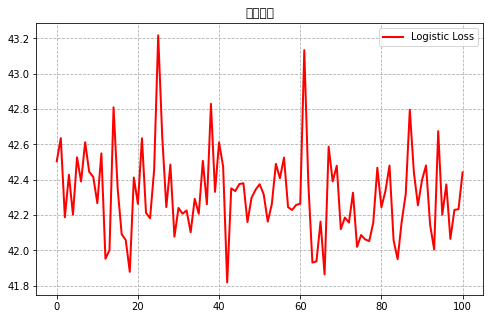

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.9375, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.9375, dtype=float32), array(0.9791667, dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.96875


In [6]:
#use the new dataset to train evaluation model model2(defined in cell1)
model=model2
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/all_samples_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/all_samples_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/MLP_20/all_samples/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP2(
  (bn0): BatchNorm1d(161, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=161, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 162
f1_score:  %.4f 0.8648264616818077
accuracy_score: 0.8695652173913043
recall_score: 0.8733297421532715
pre_recall: 0.8757495590828924
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

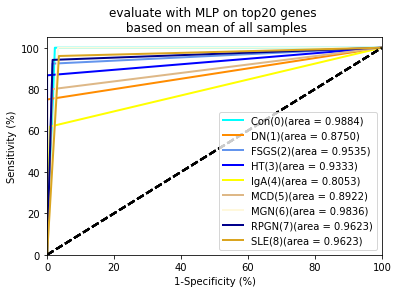

In [3]:
#test the evaluate model using the new top 20 union test dataset
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='models/MLP_20/all_samples/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP2()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/MLP_20/all_samples_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluate with MLP on top20 genes \n based on mean of all samples')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

